In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import random as r
import numpy as np

Train Shape: x = (60000, 28, 28), y = (60000,)
Test Shape: x = (10000, 28, 28), y = (10000,)


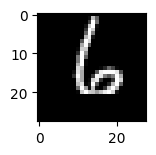

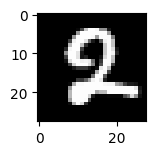

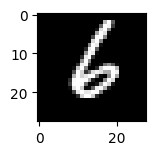

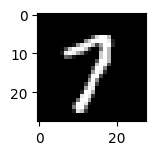

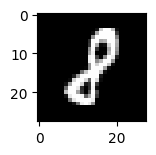

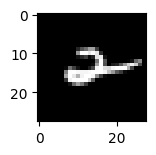

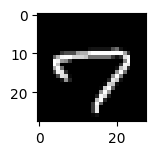

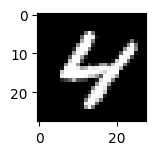

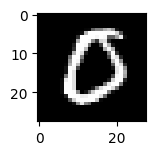

In [ ]:
# load dataset
(train_x, train_y), (test_x, test_y) = mnist.load_data()

print(f"Train Shape: x = {train_x.shape}, y = {train_y.shape}")
print(f"Test Shape: x = {test_x.shape}, y = {test_y.shape}")


# plot the images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  random_idx = r.randint(0, train_x.shape[0] - 1)
  plt.imshow(train_x[random_idx], cmap=plt.get_cmap('gray'))
  # show the figure
  plt.show()

In [ ]:
# to categorical - turns classes intro a binary representation
# 1 = [1, 0, 0, ....], 2 = [0, 1, 0, 0, ......], .......
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
train_y = keras.utils.to_categorical(train_y)
test_y = keras.utils.to_categorical(test_y)

In [ ]:
def normalize_imgs(imgs):
  return tf.squeeze(tf.cast(imgs, tf.float32) / 255.0)

In [ ]:
train_x = normalize_imgs(train_x)
test_x = normalize_imgs(test_x)

In [ ]:
model = keras.models.Sequential()
                          # num of kernels, (kernel width, kernel height), input_size
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(28, 28, 1)))
model.add(keras.layers.ReLU())     # filter size
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = ['accuracy'])

In [ ]:
# train the model
model.fit(train_x, train_y, epochs=1)

1875/1875 [==============================] - 57s 30ms/step - loss: 0.1528 - accuracy: 0.9543


In [ ]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 6s 17ms/step - loss: 0.0688 - accuracy: 0.9765


[0.06876540184020996, 0.9764999747276306]

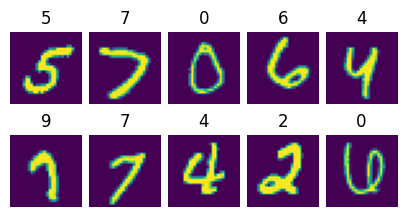

In [ ]:
fig = plt.figure(figsize=(5, 20))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i in range(10):
  random_idx = r.randint(0, test_x.shape[0] - 1)
  pred = model.predict(test_x[None, random_idx, ...], verbose=0)
  curr_ax = fig.add_subplot(15, 5, i + 1)
  curr_ax.axis('off')
  curr_ax.imshow(test_x[random_idx])
  curr_ax.set_title(np.argmax(pred)) # get the most likely label